In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv  
  inflating: Evaluation_Set/Evaluation_Set/Validation/1.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/10.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/100.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/101.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/102.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/103.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/104.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/105.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/106.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/107.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/108.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/109.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/11.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/

# 라이브러리 불러오기

In [3]:
#Importation of packages and datasets
import os
from tqdm import tqdm
from glob import glob
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random
import csv
import shutil

# pytorch module
import torch
from torchvision import datasets, transforms
import torch.utils.data  as data

from warnings import filterwarnings
filterwarnings('ignore')

# 데이터 불러오기

In [4]:
train_root_dir = '/content/Training_Set/Training_Set/'
val_root_dir = '/content/Evaluation_Set/Evaluation_Set/'
test_root_dir = '/content/Test_Set/Test_Set'

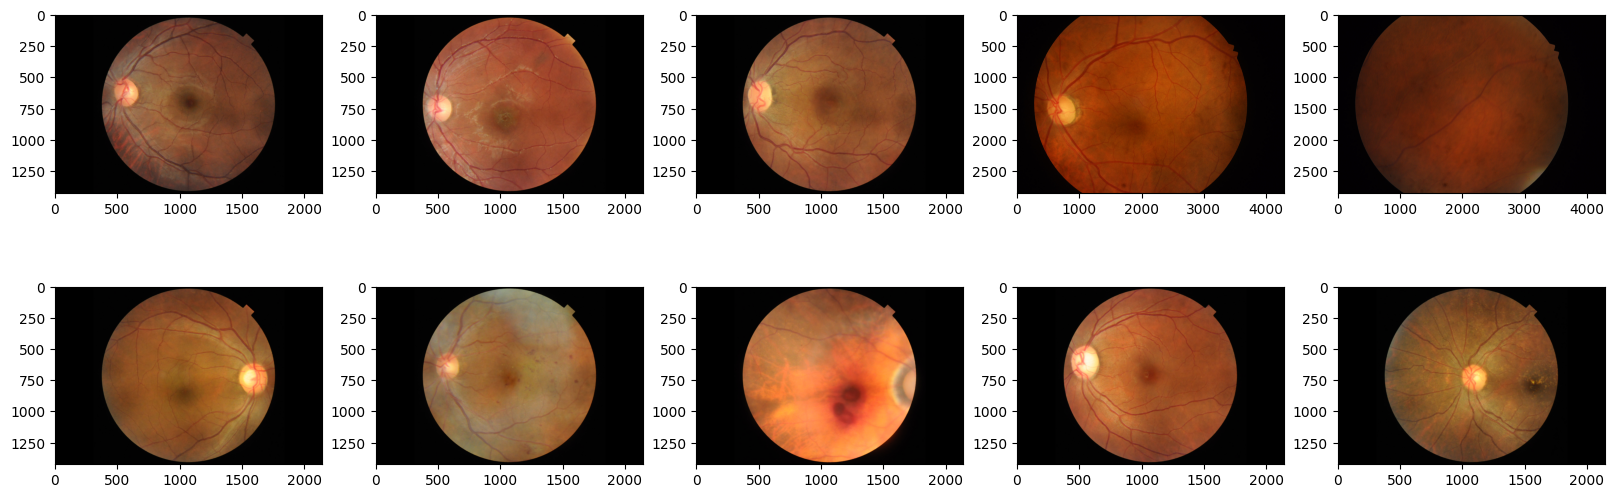

In [5]:
#Training data 랜덤하게 10개 확인하기
train_path = os.path.join(train_root_dir, "Training")
files = [os.path.join(train_path, x) for x in os.listdir(train_path)]
images = [cv2.imread(x) for x in random.sample(files, 10)]

# BGR을 RGB로 변환
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

plt.figure(figsize=(20, 10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.imshow(image)


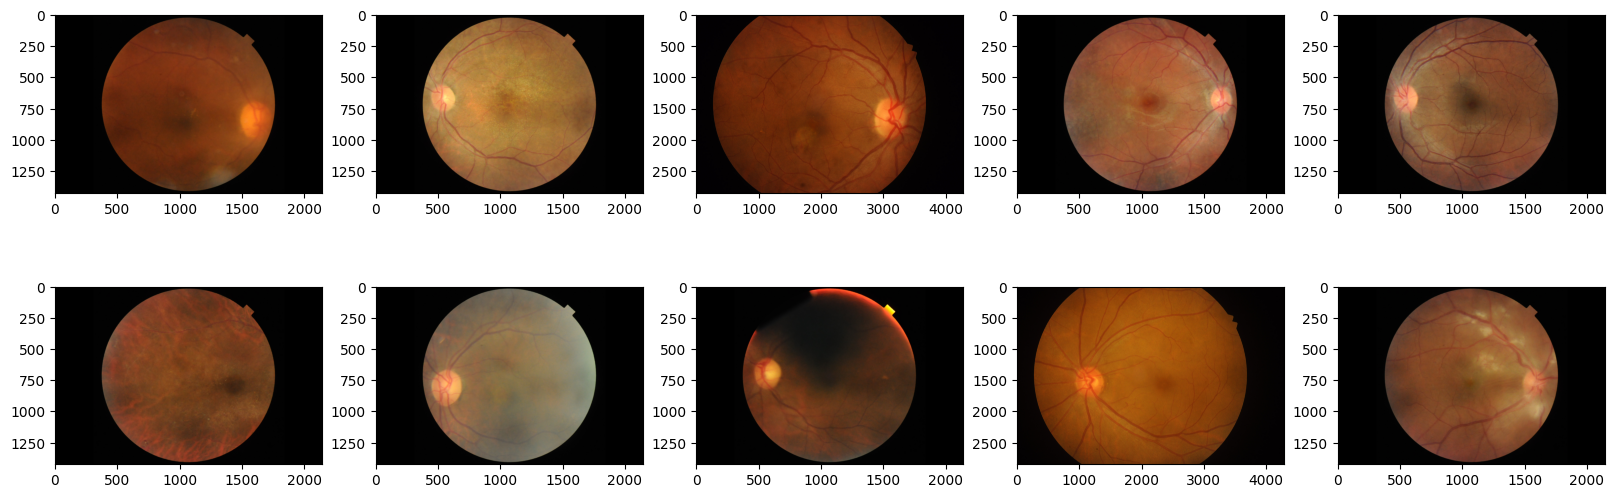

In [6]:
#Validation data 랜덤하게 10개 확인하기
val_path = os.path.join(val_root_dir, "Validation")
files = [os.path.join(val_path, x) for x in os.listdir(val_path)]
images = [cv2.imread(x) for x in random.sample(files, 10)]

# BGR을 RGB로 변환
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

plt.figure(figsize=(20, 10))
columns = 5
for i, image in enumerate(images):
  plt.subplot(int(len(images)/ columns + 1), columns, i + 1)
  plt.imshow(image)


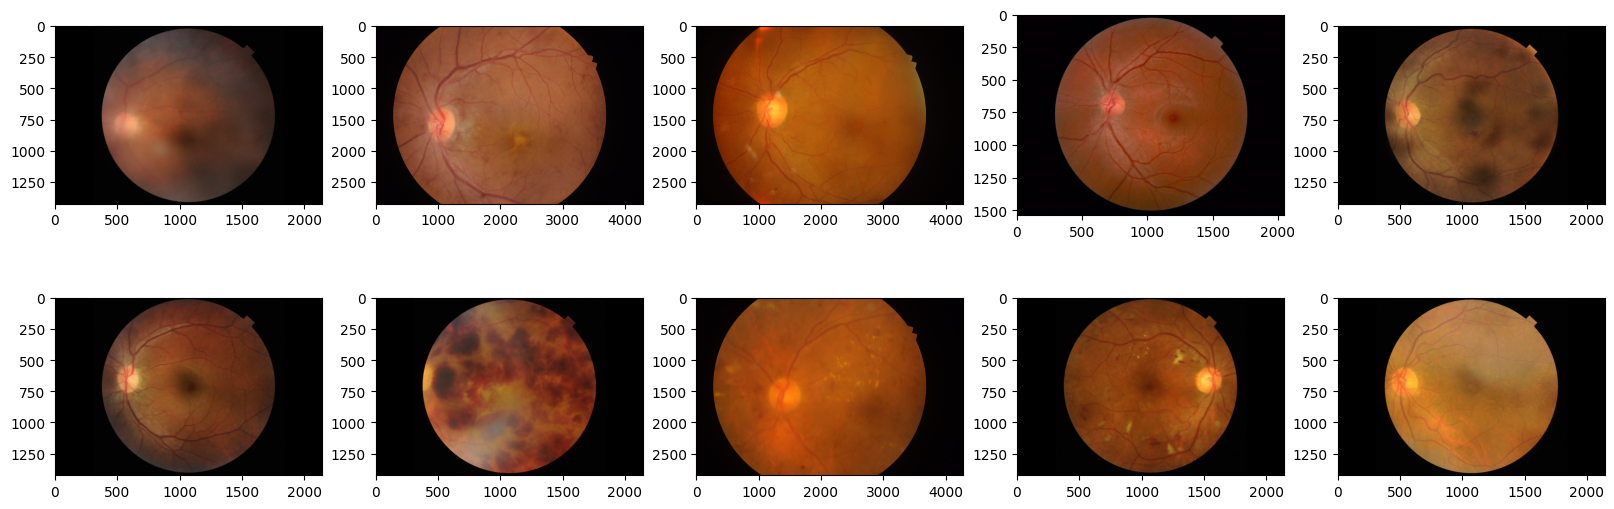

In [7]:
#Test data 랜덤하게 10개 확인하기
test_path = os.path.join(test_root_dir, "Test")
files = [os.path.join(test_path, x) for x in os.listdir(test_path)]
images = [cv2.imread(x) for x in random.sample(files, 10)]

# BGR을 RGB로 변환
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

plt.figure(figsize=(20, 10))
columns = 5
for i, image in enumerate(images):
  plt.subplot(int(len(images)/ columns + 1), columns, i + 1)
  plt.imshow(image)

In [8]:
train_labels = pd.read_csv("/content/Training_Set/Training_Set/RFMiD_Training_Labels.csv")
val_labels = pd.read_csv("/content/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv")
test_labels = pd.read_csv("/content/Test_Set/Test_Set/RFMiD_Testing_Labels.csv")

In [9]:
a=[]
b=[]
with open('/content/Training_Set/Training_Set/RFMiD_Training_Labels.csv','r') as F:
  reader=csv.reader(F)
  for row in reader:
      if(row[1]=='1'):
        a.append(row[0]+'.png')
      if(row[1]=='0'):
        b.append(row[0]+'.png')
os.mkdir('./Training')

In [10]:
parent_dir="./Training"
directory1 = "Abnormal"
directory2 = "Normal"
path1 = os.path.join(parent_dir, directory1)
path2 = os.path.join(parent_dir, directory2)
os.mkdir(path1)
os.mkdir(path2)

In [11]:
save_path = './Training/Abnormal'
for filename in a:
  shutil.copy('/content/Training_Set/Training_Set/Training/'+filename,save_path)
save_path = './Training/Normal'
for filename in b:
  shutil.copy('/content/Training_Set/Training_Set/Training/'+filename,save_path)

In [12]:
a=[]
b=[]
with open('/content/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv','r') as F:
  reader=csv.reader(F)
  for row in reader:
      if(row[1]=='1'):
        a.append(row[0]+'.png')
      if(row[1]=='0'):
        b.append(row[0]+'.png')
os.mkdir('./Validation')

In [13]:
parent_dir="./Validation"
directory1 = "Abnormal"
directory2 = "Normal"
path1 = os.path.join(parent_dir, directory1)
path2 = os.path.join(parent_dir, directory2)
os.mkdir(path1)
os.mkdir(path2)

In [14]:
save_path = './Validation/Abnormal'
for filename in a:
  shutil.copy('/content/Evaluation_Set/Evaluation_Set/Validation/'+filename,save_path)
save_path = './Validation/Normal'
for filename in b:
  shutil.copy('/content/Evaluation_Set/Evaluation_Set/Validation/'+filename,save_path)

In [15]:
a=[]
b=[]
with open('/content/Test_Set/Test_Set/RFMiD_Testing_Labels.csv','r') as F:
  reader=csv.reader(F)
  for row in reader:
      if(row[1]=='1'):
        a.append(row[0]+'.png')
      if(row[1]=='0'):
        b.append(row[0]+'.png')
os.mkdir('./Testing')

In [16]:
parent_dir="./Testing"
directory1 = "Abnormal"
directory2 = "Normal"
path1 = os.path.join(parent_dir, directory1)
path2 = os.path.join(parent_dir, directory2)
os.mkdir(path1)
os.mkdir(path2)

In [17]:
save_path = './Testing/Abnormal'
for filename in a:
  shutil.copy('/content/Test_Set/Test_Set/Test/'+filename,save_path)
save_path = './Testing/Normal'
for filename in b:
  shutil.copy('/content/Test_Set/Test_Set/Test/'+filename,save_path)

In [18]:
train_abnormal_dir = os.path.join('./Training/Abnormal')
train_normal_dir = os.path.join('./Training/Normal')
train_abnormal_names = os.listdir(train_abnormal_dir)
train_normal_names = os.listdir(train_normal_dir)
print('total training images with abnormalities:', len(os.listdir(train_abnormal_dir)))
print('total training images of normal eyes:', len(os.listdir(train_normal_dir)))

total training images with abnormalities: 1519
total training images of normal eyes: 401


In [19]:
validation_abnormal_dir = os.path.join('./Validation/Abnormal')
validation_normal_dir = os.path.join('./Validation/Normal')
validation_abnormal_names = os.listdir(validation_abnormal_dir)
validation_normal_names = os.listdir(validation_normal_dir)
print('total validation images with abnormalities:', len(os.listdir(validation_abnormal_dir)))
print('total validation images of normal eyes:', len(os.listdir(validation_normal_dir)))

total validation images with abnormalities: 506
total validation images of normal eyes: 134


In [20]:
test_abnormal_dir = os.path.join('./Testing/Abnormal')
test_normal_dir = os.path.join('./Testing/Normal')
test_abnormal_names = os.listdir(test_abnormal_dir)
test_normal_names = os.listdir(test_normal_dir)
print('total testing images with abnormalities:', len(os.listdir(test_abnormal_dir)))
print('total testing images of normal eyes:', len(os.listdir(test_normal_dir)))

total testing images with abnormalities: 506
total testing images of normal eyes: 134


# 데이터 전처리

In [21]:
torch.cuda.empty_cache()

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

random_seed = 2024

torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

np.random.seed(random_seed)
random.seed(random_seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [23]:
# 데이터 transform 적용하기
normalize = transforms.Normalize(mean=[0,0,0], std=[1,1,1])
image_transforms = {
    "train": transforms.Compose([
        transforms.Resize(256),


    # data augmentation
    transforms.RandomResizedCrop((224),scale=(0.5,1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
    normalize

    ]),
    "valid": transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ])
}

In [24]:
train_dataset_folder = "/content/Training"
val_dataset_folder = "/content/Validation"
test_dataset_folder = "/content/Testing"


In [25]:
train_dataset = datasets.ImageFolder(root=train_dataset_folder, transform=image_transforms['train'])
valid_dataset = datasets.ImageFolder(root=val_dataset_folder, transform=image_transforms['valid'])
test_dataset = datasets.ImageFolder(root=test_dataset_folder, transform=image_transforms['valid'])

In [26]:
# DataLoader을 위한 hyperparameter 설정

train_params = {
    "batch_size": 64,
    "shuffle": True,
    "num_workers": 0,
    "drop_last": False}

valid_params = {
      "batch_size": 64,
      "shuffle": False,
      "num_workers": 0,
      "drop_last": False}

In [27]:
train_loader = data.DataLoader(train_dataset, **train_params)
valid_loader = data.DataLoader(valid_dataset, **valid_params)
test_loader = data.DataLoader(test_dataset, **valid_params)

In [28]:
# Train DataLoader 데이터 확인해보기

for x, y in train_loader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([64, 3, 224, 224])
torch.Size([64])


In [29]:
# Valid DataLoader 데이터 확인해보기

for x, y in valid_loader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([64, 3, 224, 224])
torch.Size([64])


In [30]:
# test DataLoader 데이터 확인해보기

for x, y in test_loader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([64, 3, 224, 224])
torch.Size([64])


# 모델 만들기

In [31]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [32]:
# 모델 설정 값

config = {
    'cls_hidden_dims': []
}

In [33]:
import torch
print(torch.__version__)

2.1.0+cu121


In [34]:
class Retinal(nn.Module):
    """pretrain 된 ResNet을 이용해 CT image embedding
    """

    def __init__(self):
        """
		Args:
			base_model : resnet18 / resnet50
			config: 모델 설정 값
		"""
        super(Retinal, self).__init__()

        model = models.resnet152(pretrained=True)
        num_ftrs = model.fc.in_features
        self.num_ftrs = num_ftrs

        for name, param in model.named_parameters():
            if 'layer2' in name:
                break
            param.requires_grad = False

        self.features = nn.Sequential(*list(model.children())[:-1])

    def forward(self, x):
        x = self.features(x)
        b = x.size(0)
        x = x.view(b, -1)

        return x


In [35]:
model_image = Retinal()
model_image

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:01<00:00, 157MB/s]


Retinal(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64,

In [36]:
class Classifier(nn.Sequential):
    """임베딩 된 feature를 이용해 classificaion
    """
    def __init__(self, model_image, **config):
        """
        Args:
            model_image : image emedding 모델
            config: 모델 설정 값
        """
        super(Classifier, self).__init__()

        self.model_image = model_image # image 임베딩 모델

        self.input_dim = model_image.num_ftrs # image feature 사이즈
        self.dropout = nn.Dropout(0.1) # dropout 적용

        self.hidden_dims = config['cls_hidden_dims'] # classifier hidden dimensions
        layer_size = len(self.hidden_dims) + 1 # hidden layer 개수
        dims = [self.input_dim] + self.hidden_dims + [2]

        self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)]) # classifer layers

    def forward(self, v):
        # Drug/protein 임베딩
        v_i = self.model_image(v) # batch_size x hidden_dim

        for i, l in enumerate(self.predictor):
            if i == (len(self.predictor)-1):
                # If last layer,
                v_i = l(v_i)
            else:
                # If Not last layer, dropout과 ReLU 적용
                v_i = F.relu(self.dropout(l(v_i)))

        return v_i

In [37]:
model = Classifier(model_image, **config)
model

Classifier(
  (model_image): Retinal(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
  

# 모델 학습 (Model training)

## 모델 학습을 위한 설정

In [38]:
# 학습에 필요한 변수 설정

# 학습 진행에 필요한 hyperparameter

learning_rate = 0.0001
train_epoch   = 10

In [39]:
# optimizer

opt     = torch.optim.Adam(model.parameters(), lr = learning_rate)
loss_fn = torch.nn.CrossEntropyLoss()

In [40]:
import copy
from prettytable import PrettyTable
from time import time
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

## 모델 학습 진행

In [41]:
loss_history_train = []
loss_history_val = []

max_acc = 0

# 모델 GPU 메모리에 올리기
model = model.to(device)

# Best 모델 초기화
model_best = copy.deepcopy(model)

# 결과 정리를 위한 PrettyTable
valid_metric_record = []
valid_metric_header = ["# epoch"]
valid_metric_header.extend(["Accuracy", "sensitivity", "specificity", "roc_score"])
table = PrettyTable(valid_metric_header)

float2str = lambda x:'%0.4f'%x # float 소숫점 4자리까지만 str로 바꾸기

# 학습 진행
print('--- Go for Training ---')
# 학습 시작 시간 기록
t_start = time()

for epo in range(train_epoch):
    # Model training
    model.train()

    # Mini-batch 학습
    for i, (v_i, label) in enumerate(train_loader):
        # input data gpu에 올리기
        v_i = v_i.float().to(device)
        # forward-pass
        output = model(v_i)

        # 미리 정의한 손실함수(MSE)로 손실(loss) 계산
        loss = loss_fn(output, label.to(device))

        # 각 iteration 마다 loss 기록
        loss_history_train.append(loss.item())

        # gradient 초기화
        opt.zero_grad()
        # back propagation
        loss.backward()
        # parameter update
        opt.step()

    # gradient tracking X
    with torch.set_grad_enabled(False):

        y_pred = []
        y_score = []
        y_label = []
        # model validation
        model.eval()

        for i, (v_i, label) in enumerate(valid_loader):
            # validation 입력 데이터 gpu에 올리기
            v_i = v_i.float().to(device)

            # forward-pass
            output = model(v_i)

            # 미리 정의한 손실함수(MSE)로 손실(loss) 계산
            loss = loss_fn(output, label.to(device))

            # 각 iteration 마다 loss 기록
            loss_history_val.append(loss.item())

            pred = output.argmax(dim=1, keepdim=True)
            score = nn.Softmax(dim = 1)(output)[:,1]

            # 예측값, 참값 cpu로 옮기고 numpy 형으로 변환
            pred = pred.cpu().numpy()
            score = score.cpu().numpy()
            label = label.cpu().numpy()

            # 예측값, 참값 기록하기
            y_label = y_label + label.flatten().tolist()
            y_pred = y_pred + pred.flatten().tolist()
            y_score = y_score + score.flatten().tolist()

    # metric 계산
    classification_metrics = classification_report(y_label, y_pred,
                        target_names = ['Normal', 'Abnormal'],
                        output_dict= True)

    # sensitivity is the recall of the positive class
    sensitivity = classification_metrics['Abnormal']['recall']
    # specificity is the recall of the negative class
    specificity = classification_metrics['Normal']['recall']
    # accuracy
    accuracy = classification_metrics['accuracy']
    # confusion matrix
    conf_matrix = confusion_matrix(y_label, y_pred)
    # roc score
    roc_score = roc_auc_score(y_label, y_score)

    # 계산한 metric 합치기
    lst = ["epoch " + str(epo)] + list(map(float2str,[accuracy, sensitivity, specificity, roc_score]))

    # 각 epoch 마다 결과값 pretty table에 기록
    table.add_row(lst)
    valid_metric_record.append(lst)

    # mse 기준으로 best model 업데이트
    if accuracy > max_acc:
        # best model deepcopy
        model_best = copy.deepcopy(model)
        # max MSE 업데이트
        max_acc = accuracy

    # 각 epoch 마다 결과 출력
    print('Validation at Epoch '+ str(epo + 1) + ' , Accuracy: ' + str(accuracy)[:7] + ' , sensitivity: '\
						 + str(sensitivity)[:7] + ', specificity: ' + str(f"{specificity}") +' , roc_score: '+str(roc_score)[:7])

--- Go for Training ---
Validation at Epoch 1 , Accuracy: 0.84843 , sensitivity: 0.64179, specificity: 0.9031620553359684 , roc_score: 0.92234
Validation at Epoch 2 , Accuracy: 0.87656 , sensitivity: 0.61194, specificity: 0.9466403162055336 , roc_score: 0.92866
Validation at Epoch 3 , Accuracy: 0.86562 , sensitivity: 0.62686, specificity: 0.9288537549407114 , roc_score: 0.92998
Validation at Epoch 4 , Accuracy: 0.86406 , sensitivity: 0.70895, specificity: 0.9051383399209486 , roc_score: 0.91701
Validation at Epoch 5 , Accuracy: 0.88125 , sensitivity: 0.74626, specificity: 0.9169960474308301 , roc_score: 0.93290
Validation at Epoch 6 , Accuracy: 0.85781 , sensitivity: 0.5, specificity: 0.9525691699604744 , roc_score: 0.93109
Validation at Epoch 7 , Accuracy: 0.86406 , sensitivity: 0.64179, specificity: 0.9229249011857708 , roc_score: 0.91973
Validation at Epoch 8 , Accuracy: 0.84375 , sensitivity: 0.92537, specificity: 0.8221343873517787 , roc_score: 0.92826
Validation at Epoch 9 , Accu

In [42]:
# Test dataloader 확인
for i, (v_i, label) in enumerate(test_loader):
    print(v_i.shape)
    print(label.shape)
    break

torch.Size([64, 3, 224, 224])
torch.Size([64])


In [43]:
# 테스트 진행

model = model_best

y_pred = []
y_label = []
y_score = []

model.eval()
for i, (v_i, label) in enumerate(test_loader):
    # input data gpu에 올리기
    v_i = v_i.float().to(device)

    with torch.set_grad_enabled(False):
        # forward-pass
        output = model(v_i)

        # 미리 정의한 손실함수(MSE)로 손실(loss) 계산
        loss = loss_fn(output, label.to(device))

        # 각 iteration 마다 loss 기록
        loss_history_val.append(loss.item())

        pred = output.argmax(dim=1, keepdim=True)
        score = nn.Softmax(dim = 1)(output)[:,1]

        # 예측값, 참값 cpu로 옮기고 numpy 형으로 변환
        pred = pred.cpu().numpy()
        score = score.cpu().numpy()
        label = label.cpu().numpy()

    # 예측값, 참값 기록하기
    y_label = y_label + label.flatten().tolist()
    y_pred = y_pred + pred.flatten().tolist()
    y_score = y_score + score.flatten().tolist()

# metric 계산
classification_metrics = classification_report(y_label, y_pred,
                    target_names = ['Normal', 'Abnormal'],
                    output_dict= True)
# sensitivity is the recall of the positive class
sensitivity = classification_metrics['Abnormal']['recall']
# specificity is the recall of the negative class
specificity = classification_metrics['Normal']['recall']
# accuracy
accuracy = classification_metrics['accuracy']
# confusion matrix
conf_matrix = confusion_matrix(y_label, y_pred)
# roc score
roc_score = roc_auc_score(y_label, y_score)

# 각 epoch 마다 결과 출력
print('Validation at Epoch '+ str(epo + 1) + ' , Accuracy: ' + str(accuracy)[:7] + ' , sensitivity: '\
                        + str(sensitivity)[:7] + ' specificity: ' + str(f"{specificity}") +' , roc_score: '+str(roc_score)[:7])

Validation at Epoch 10 , Accuracy: 0.93437 , sensitivity: 0.82835 specificity: 0.9624505928853755 , roc_score: 0.97057


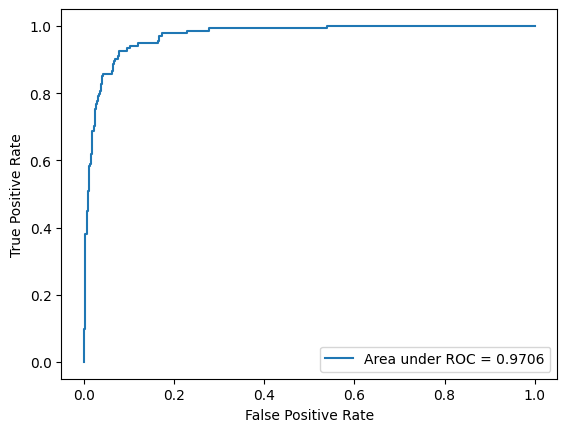

In [44]:
# plot the roc curve
fpr, tpr, _ = roc_curve(y_label, y_score)
plt.plot(fpr, tpr, label = "Area under ROC = {:.4f}".format(roc_score))
plt.legend(loc = 'best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

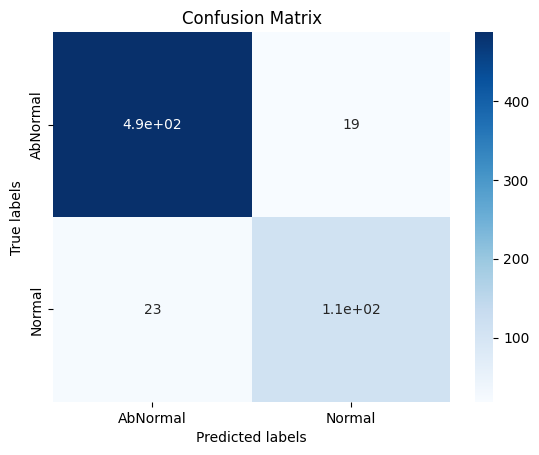

In [45]:
import seaborn as sns

conf_matrix = conf_matrix
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax, cmap = 'Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['AbNormal', 'Normal']); ax.yaxis.set_ticklabels(['AbNormal', 'Normal']);